<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 2진 분류(binary-class classification) 문제

*   breast cancer 데이터에서 Malignant/Benign 분류
*   KNN classifier
*   Logistic regression
*   SGD classifier

## 데이터 셋 준비

In [2]:
bc = datasets.load_breast_cancer()

In [3]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x = bc.data  # 특성 배열(2d array)
y = bc.target  # 타겟 배열(1d array)

In [5]:
x.shape

(569, 30)

In [6]:
y.shape

(569,)

In [7]:
pd.Series(y).value_counts()  # 0 - Malignant(암), 1 - Benign(음성)

,count
1,357
0,212


TODO: 탐색적 데이터 분석(데이터 시각화: 빈도 막대 그래프, 히스토그램, 산점도 pairplot)

## 훈련 셋, 테스트 셋 나누기

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## KNN

In [9]:
# ML 모델
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('knn', KNeighborsClassifier())])

In [10]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [11]:
train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값

In [12]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[161,   9],
       [  3, 282]])

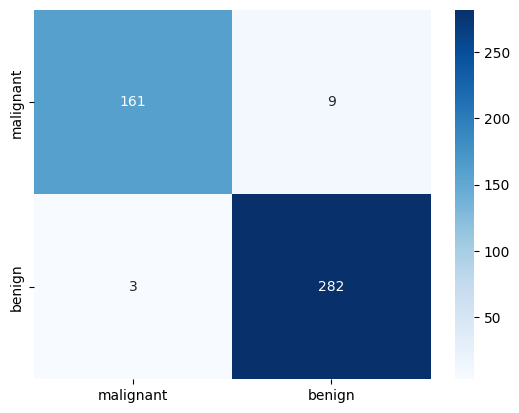

In [13]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=bc.target_names, yticklabels=bc.target_names)
plt.show()

In [14]:
print(classification_report(y_true=y_train, y_pred=train_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       170
      benign       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [15]:
test_pred = pipe.predict(X=x_test)  # 테스트 셋 예측값

In [16]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Logistic Regression

In [17]:
# Logistic Regression ML 모델 생성
logit = LogisticRegression(random_state=42, max_iter=10_000)

In [18]:
# ML 모델 훈련
logit.fit(X=x_train, y=y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [19]:
logit.coef_

array([[ 0.80708196,  0.11328911, -0.28307687,  0.02521483, -0.16733751,
        -0.20217576, -0.45506264, -0.25243782, -0.30921281, -0.03116865,
        -0.05511739,  1.10334223,  0.08564572, -0.09595851, -0.02231761,
         0.05911651, -0.02139347, -0.03540418, -0.04039299,  0.0137089 ,
         0.09521451, -0.37693116, -0.08781235, -0.01459524, -0.32483321,
        -0.74767161, -1.32332634, -0.56343008, -0.78785848, -0.09156122]])

In [20]:
train_pred = logit.predict(X=x_train)  # 훈련 셋 예측값

In [21]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[158,  12],
       [  8, 277]])

In [22]:
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94       170
      benign       0.96      0.97      0.97       285

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



In [23]:
test_pred = logit.predict(X=x_test)  # 테스트 셋 예측값

In [24]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



TODO: Pipeline(PolynomialFeature -> StandardScaler -> LogisticRegression)

## SGD Classifier

In [27]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('estimator', SGDClassifier(loss='log_loss', random_state=42))
])

In [28]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('estimator', SGDClassifier(loss='log_loss', random_state=42))])

In [ ]:
pipe['estimator'].coef_  # 모델이 데이터를 학습한 후에 찾은 모델 파라미터들

In [30]:
train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값

In [31]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[169,   1],
       [  1, 284]])

In [32]:
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.99      0.99       170
      benign       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [34]:
test_pred = pipe.predict(X=x_test)
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
pipe.score(X=x_test, y=y_test)

0.956140350877193

# 다중 클래스 분류(multi-class classification) 문제

*   iris 데이터에서 Setosa/Versicolor/Virginica 분류
*   KNN
*   Logistic regressin
*   SGD classifier

## 데이터셋 준비

In [36]:
iris = datasets.load_iris()

In [37]:
x = iris.data  # 특성 배열(2d array)
y = iris.target  # 타겟 배열, 레이블(1d array)

In [38]:
x.shape, y.shape

((150, 4), (150,))

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
pd.Series(y).value_counts()

,count
0,50
1,50
2,50


TODO: 탐색적 데이터 탐색(시각화 - countplot, histogram, pairplot, ...)

In [42]:
# 훈련 셋, 테스트 셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## KNN

In [43]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('estimator', KNeighborsClassifier())
])

In [44]:
pipe.fit(X=x_train, y=y_train)  # ML 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', KNeighborsClassifier())])

In [45]:
train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값

In [46]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

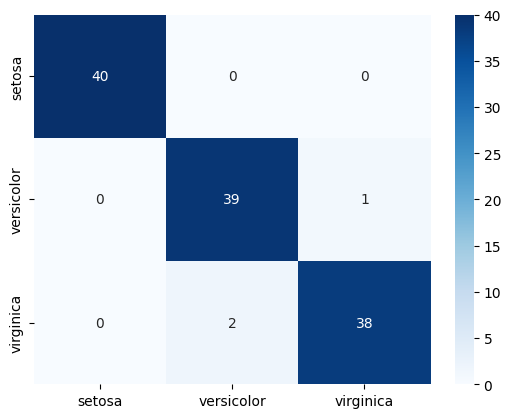

In [49]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [50]:
# 훈련 셋 분류 리포트
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.97      0.96        40
   virginica       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [51]:
test_pred = pipe.predict(X=x_test)

In [52]:
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [54]:
pipe.score(X=x_test, y=y_test)  # 테스트 셋 정확도

0.9333333333333333

## LogisticRegression

In [60]:
# ML 모델 생성
logit = LogisticRegression(random_state=42,
                           penalty='l2', C=(1/0.0001), max_iter=1_000, tol=0.001)

In [61]:
logit.fit(X=x_train, y=y_train)

LogisticRegression(C=10000.0, max_iter=1000, random_state=42, tol=0.001)

In [62]:
# ML 모델 훈련
logit.fit(X=x_train, y=y_train)

LogisticRegression(C=10000.0, max_iter=1000, random_state=42, tol=0.001)

In [63]:
# Logistic Regression 알고리즘이 데이터를 학습하고 찾은 모델 파라미터들
logit.coef_  # shape: (3, 4) = (n_classes, n_features)

array([[  5.60921302,  16.08296718, -24.20363691, -11.13427071],
       [ -2.11164606,  -4.67919125,   8.08153865,  -3.02012828],
       [ -3.49756696, -11.40377593,  16.12209826,  14.15439899]])

In [64]:
# 훈련 셋 예측값
train_pred = logit.predict(X=x_train)

In [65]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  1, 39]])

In [68]:
# 훈련 셋 정확도(accuracy)
logit.score(X=x_train, y=y_train)

0.9833333333333333

In [70]:
test_pred = logit.predict(X=x_test)
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [69]:
# 테스트 셋 정확도
logit.score(X=x_test, y=y_test)  #> 과소적합(under-fitting)

1.0